# NPL

## Intro

In [ ]:
TF IDF

## DevOps

### Demo/Restaurant_Reviews

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hpzju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


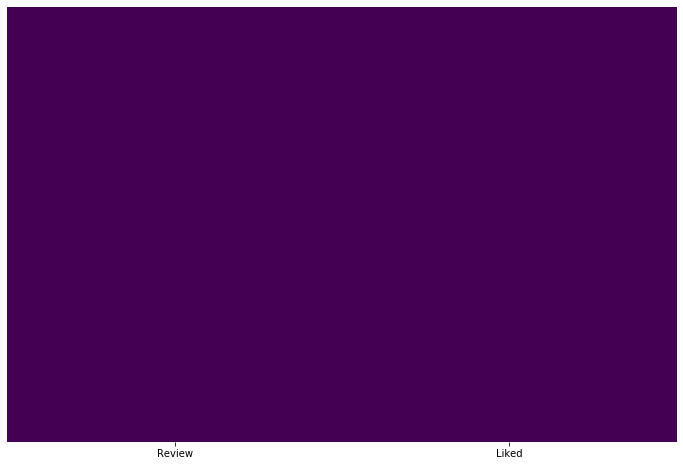

In [47]:
filename='Restaurant_Reviews.tsv'
rds = pd.read_csv('Data/'+filename, delimiter='\t', quoting=3)
plt.figure(figsize=(12,8))
sns.heatmap(data=rds.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
rds.columns

Index(['Review', 'Liked'], dtype='object')

In [49]:
ds = rds.copy()
def preprocessing(text):
    nonletter = re.compile('[^a-zA-Z]')
    stopwords_set = set(stopwords.words('english'))
    porsterstemmer = PorterStemmer()
    
    review = re.sub(nonletter, ' ', text).lower().split()
    review = [porsterstemmer.stem(word) for word in review if not word in stopwords_set]
    review = ' '.join(review)
    return review

ds['Review'] = rds['Review'].apply(preprocessing)

In [84]:
countervectorizer = CountVectorizer(max_features=1500)
X = countervectorizer.fit_transform(ds['Review'].values).toarray()
y = rds['Liked'].values

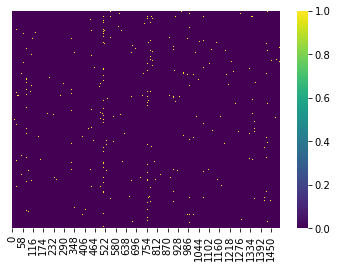

In [89]:
sns.heatmap(data=(X>0), yticklabels=False, cbar=True, cmap='viridis')

In [92]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
y_pred = classifier.predict(X_test)

In [95]:
print(confusion_matrix(y_test, y_pred))

[[55 42]
 [12 91]]


# Text Processing

# End